In [1]:
%matplotlib notebook

from modsim import *


In [2]:
m = UNITS.meter
s = UNITS.second
kg = UNITS.kilogram
degree = UNITS.degree
radian = UNITS.radian

In [154]:
condition = Condition(g = -9.8 * m/s**2,
                     point_a = (0.0 * m, 10.0 * m),
                     point_b = (10.0 * m, 0.0 * m),
                     length = .15 * m,
                     width = .15* m,
                     height = .15 * m,
                     rho = 1.225 *kg/m**3,
                     v_init= 0 * m/s,
                     C_d = 0.8,
                     C_f = .02,
                     density = 1920 * kg/m**3,
                     t0=0)

In [228]:
condition_dimensionless = Condition(g = -9.8,
                     point_a = (0.0, 10.0),
                     point_b = (10.0, 0.0),
                     length = .15,
                     width = .15,
                     height = .15,
                     rho = 1.225,
                     v_init= 0,
                     C_d = 0.8,
                     C_f = .02,
                     density = 1920,
                     t0=0)

In [279]:
def make_system(condition, slope= None):
    unpack(condition)
    
    mass= length*width*height*density
    surface_area = height*width
    
    init= State(x= point_a[0], y= point_a[1], v=v_init)
    system=System(init=init, condition=condition, slope=slope, mass=mass, sa=surface_area, dt=.001)
    return system

In [272]:
system= make_system(condition_dimensionless, slope = -1)
system.condition

,value
g,-9.8
point_a,"(0.0, 10.0)"
point_b,"(10.0, 0.0)"
length,0.15
width,0.15
height,0.15
rho,1.225
v_init,0
C_d,0.8
C_f,0.02


In [273]:
def update_func(system):
    
    unpack(system)
    
    slope = system.slope
    if init.y <= 0:
        slope = 0
        
    theta= np.arctan(slope)
    
    
    f_drag = .5 * condition.C_d * rho * init.v**2 * sa 
    f_fric = condition.C_f * mass * condition.g * np.cos(theta)
    f_grav = mass * condition.g * np.sin(theta)
   
    f_total =   f_grav
    a = f_total/mass
    
    init.v += a*dt
    
    vx = init.v * np.cos(theta)
    vy = init.v * np.sin(theta)
    
    init.x += vx*dt
    init.y += vy*dt
    
    return State(x=init.x, y=init.y, v=init.v)

In [274]:
update_func(system)

,value
x,0.000123
y,9.999878
v,0.034648


In [275]:
def run_simulation(system, update_func):
    unpack(system)
    frame = TimeFrame(columns= init.index)
    frame.loc[condition.t0] = init
    
    t = condition.t0
    x = init.x
    y = init.y
    v = init.v
    
    while init.x < condition.point_b[0]:
        t += dt
        frame.loc[t] = update_func(system)
        
    system.results = frame
    return t

In [276]:
t = run_simulation(system, update_func)
print(t)

2.0149999999999793


In [277]:
def time (slope, condition):
    system = make_system(condition_dimensionless, slope)
    t = run_simulation(system, update_func)
    return t

In [281]:
slopes= linspace(-3, -1, 10)
sweep = SweepSeries()

for slope in slopes:
    t = time(slope, condition)
    print(slope, t)
    sweep[slope] = t

-5.0 2.0289999999998876
-4.55555555556 2.0209999999998884
-4.11111111111 2.0109999999998895
-3.66666666667 2.0009999999998906
-3.22222222222 1.9889999999998917
-2.77777777778 1.9759999999998932
-2.33333333333 1.9629999999998946
-1.88888888889 1.9529999999998957
-1.44444444444 1.9579999999998952
-1.0 2.0199999999998886


<IPython.core.display.Javascript object>


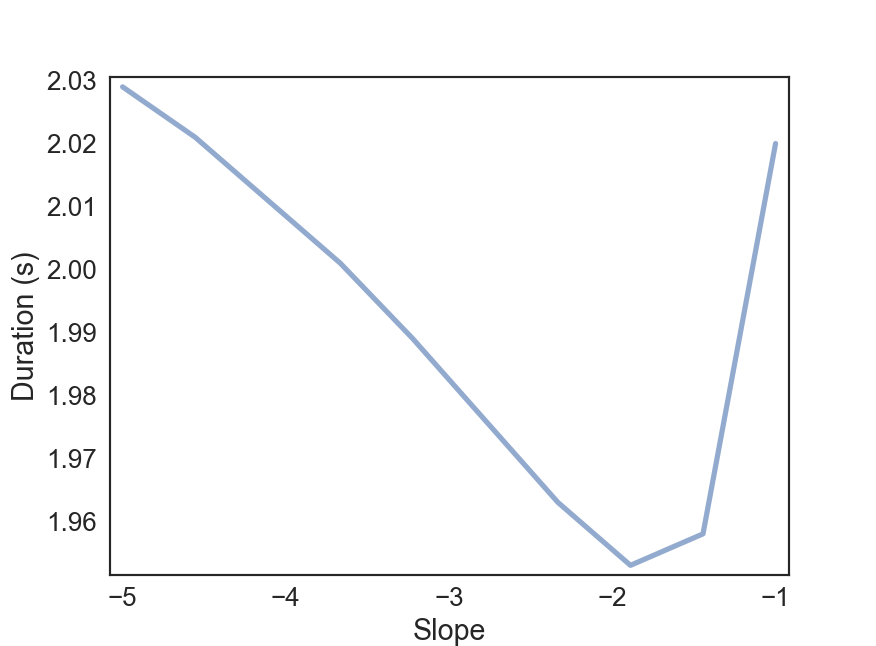

C:\ProgramData\Miniconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [282]:
newfig()
plot(sweep)
decorate(xlabel='Slope',
         ylabel='Duration (s)')

In [283]:
min_bounded(time, [-5, -1], condition_dimensionless)

     fun: 1.9519999999998958
 message: 'Solution found.'
    nfev: 19
  status: 0
 success: True
       x: -1.6516631819175933

In [40]:
system.init

,value
x,10.00541
y,-0.00541
v,8.69801


In [284]:
system1 = make_system(condition_dimensionless, slope = -1)
system2 = make_system(condition_dimensionless, slope = -1.6516631819175933)
system3 = make_system(condition_dimensionless, slope = -5)
t1 = run_simulation(system1, update_func)
t2 = run_simulation(system2, update_func)
t3 = run_simulation(system3, update_func)
frame1 = system1.results
frame2 = system2.results
frame3 = system3.results

<IPython.core.display.Javascript object>


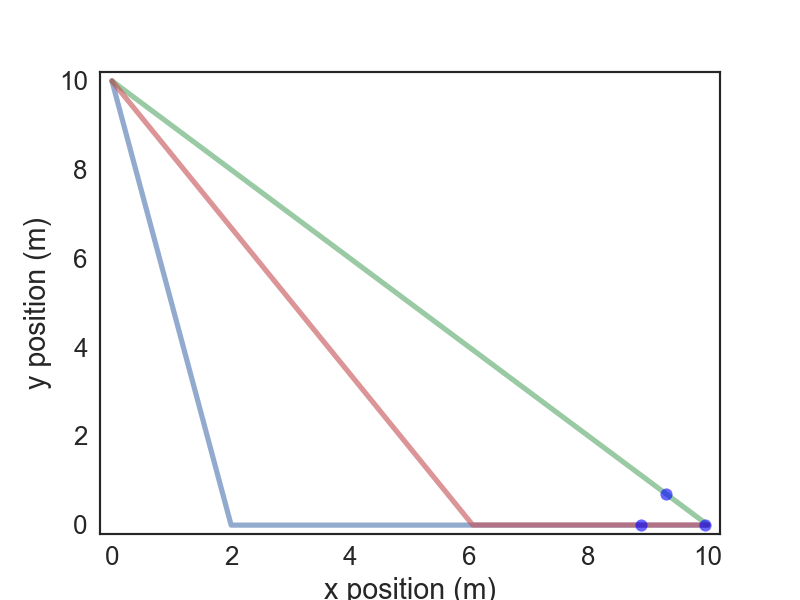

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [308]:
newfig()
decorate(xlabel='x position (m)',
         ylabel='y position (m)',
    
         legend=False)

plot(frame3.x, frame3.y, label='')
plot(frame1.x, frame1.y, label='')
plot(frame2.x, frame2.y, label='')
count = 0
for x1, y1, x2, y2, x3, y3 in zip(frame1.x, frame1.y, frame2.x, frame2.y, frame3.x, frame3.y):
    count += 1
    if count%10 != 0:
        continue
    plot([x1, x2, x3], [y1, y2, y3], 'bo', update=True)
   